
# Q2: How are the sensor readings correlated?
    a. Calculate the correlation
    b. Draw Correlation heat map

**Purpose of the question**: understand how redundant is the data

In [1]:
# !pip install lasio pandas missingno seaborn matplotlib numpy --quiet
import lasio
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
df = lasio.read("./Data/16_10-2.las").df()
df.reset_index(inplace=True)
df.columns

Index(['DEPT', 'LITHOLOGY_GEOLINK', 'DCAL', 'CALI', 'BS', 'DRHO', 'THOR',
       'NPHI', 'RHOB', 'PEF', 'GR', 'URAN', 'DTC', 'RDEP', 'SP', 'RMED'],
      dtype='object')

In [3]:
rename_columns(df)
rename_lithology(df)
df.describe()

,Measured Depth,Differential Caliper,Caliper,Borehole Size,Density Correction,Thorium Concentration,Neutron Porosity,Bulk Density,Photo Electric Factor,Gamma Ray,Uranium Concentration,Compressional waves sonic,Deep Resistivity,Self Potential,Medium Deep Resistivity
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2435.000000,2515.000000,2452.000000,2515.000000,2515.000000,2515.000000
mean,2958.388786,0.452704,9.256879,8.804175,-0.004834,6.042344,0.263101,2.353910,8.198820,62.192292,2.684754,86.421083,0.973617,82.803528,1.540778
std,110.667131,1.309057,1.629118,1.023988,0.145864,2.887955,0.066550,0.141158,23.179411,50.819201,5.869332,11.496034,0.752103,21.918806,0.976381
min,2766.821777,-3.515625,8.289063,8.500000,-1.106754,1.139225,0.056863,1.472794,2.894611,10.611666,-0.810094,57.601410,0.165527,33.177391,0.225675
25%,2862.605469,-0.203125,8.296875,8.500000,0.005027,4.008080,0.224720,2.291146,4.527247,35.409744,0.427689,80.800625,0.546890,70.425129,1.086383
50%,2958.388672,-0.062500,8.437500,8.500000,0.010793,5.567254,0.247460,2.365827,5.346721,49.281109,0.869564,84.199921,0.758283,88.800278,1.322227
75%,3054.172119,0.828141,9.476562,8.500000,0.021901,7.419950,0.275076,2.442041,6.473243,62.939289,1.463555,88.097937,1.202652,98.299530,1.651282
max,3149.955566,6.350042,18.123569,12.250001,0.149682,18.956129,0.501940,2.661118,998.892578,268.997192,28.493650,128.898804,5.082023,122.549301,15.835220


In [4]:
df.head()

,Measured Depth,LITHOLOGY,Differential Caliper,Caliper,Borehole Size,Density Correction,Thorium Concentration,Neutron Porosity,Bulk Density,Photo Electric Factor,Gamma Ray,Uranium Concentration,Compressional waves sonic,Deep Resistivity,Self Potential,Medium Deep Resistivity
0,2766.821777,Limestone,-3.515625,8.734375,12.250001,-0.865661,2.300788,0.263183,2.109411,115.513496,15.034204,0.407668,67.806335,4.066531,97.949799,4.310449
1,2766.974365,Limestone,-3.515625,8.734375,12.250001,-0.865816,2.035995,0.275393,2.123896,81.952339,12.782315,0.399241,67.104225,4.152548,97.826576,5.579180
2,2767.126709,Limestone,-3.515625,8.734375,12.250001,-0.843267,2.066535,0.275164,2.180636,56.002811,15.656550,0.611623,68.795570,4.265510,98.699097,6.155671
3,2767.279053,Limestone,-3.515625,8.734375,12.250001,-0.885725,1.900795,0.289229,2.151956,71.490158,16.950230,0.642514,69.398666,4.433485,99.699348,5.309133
4,2767.431397,Limestone,-3.515625,8.734375,12.250001,-0.920036,1.432484,0.289076,2.120508,45.694382,17.077688,0.455483,69.200691,4.671810,100.324799,4.386965


<Axes: >

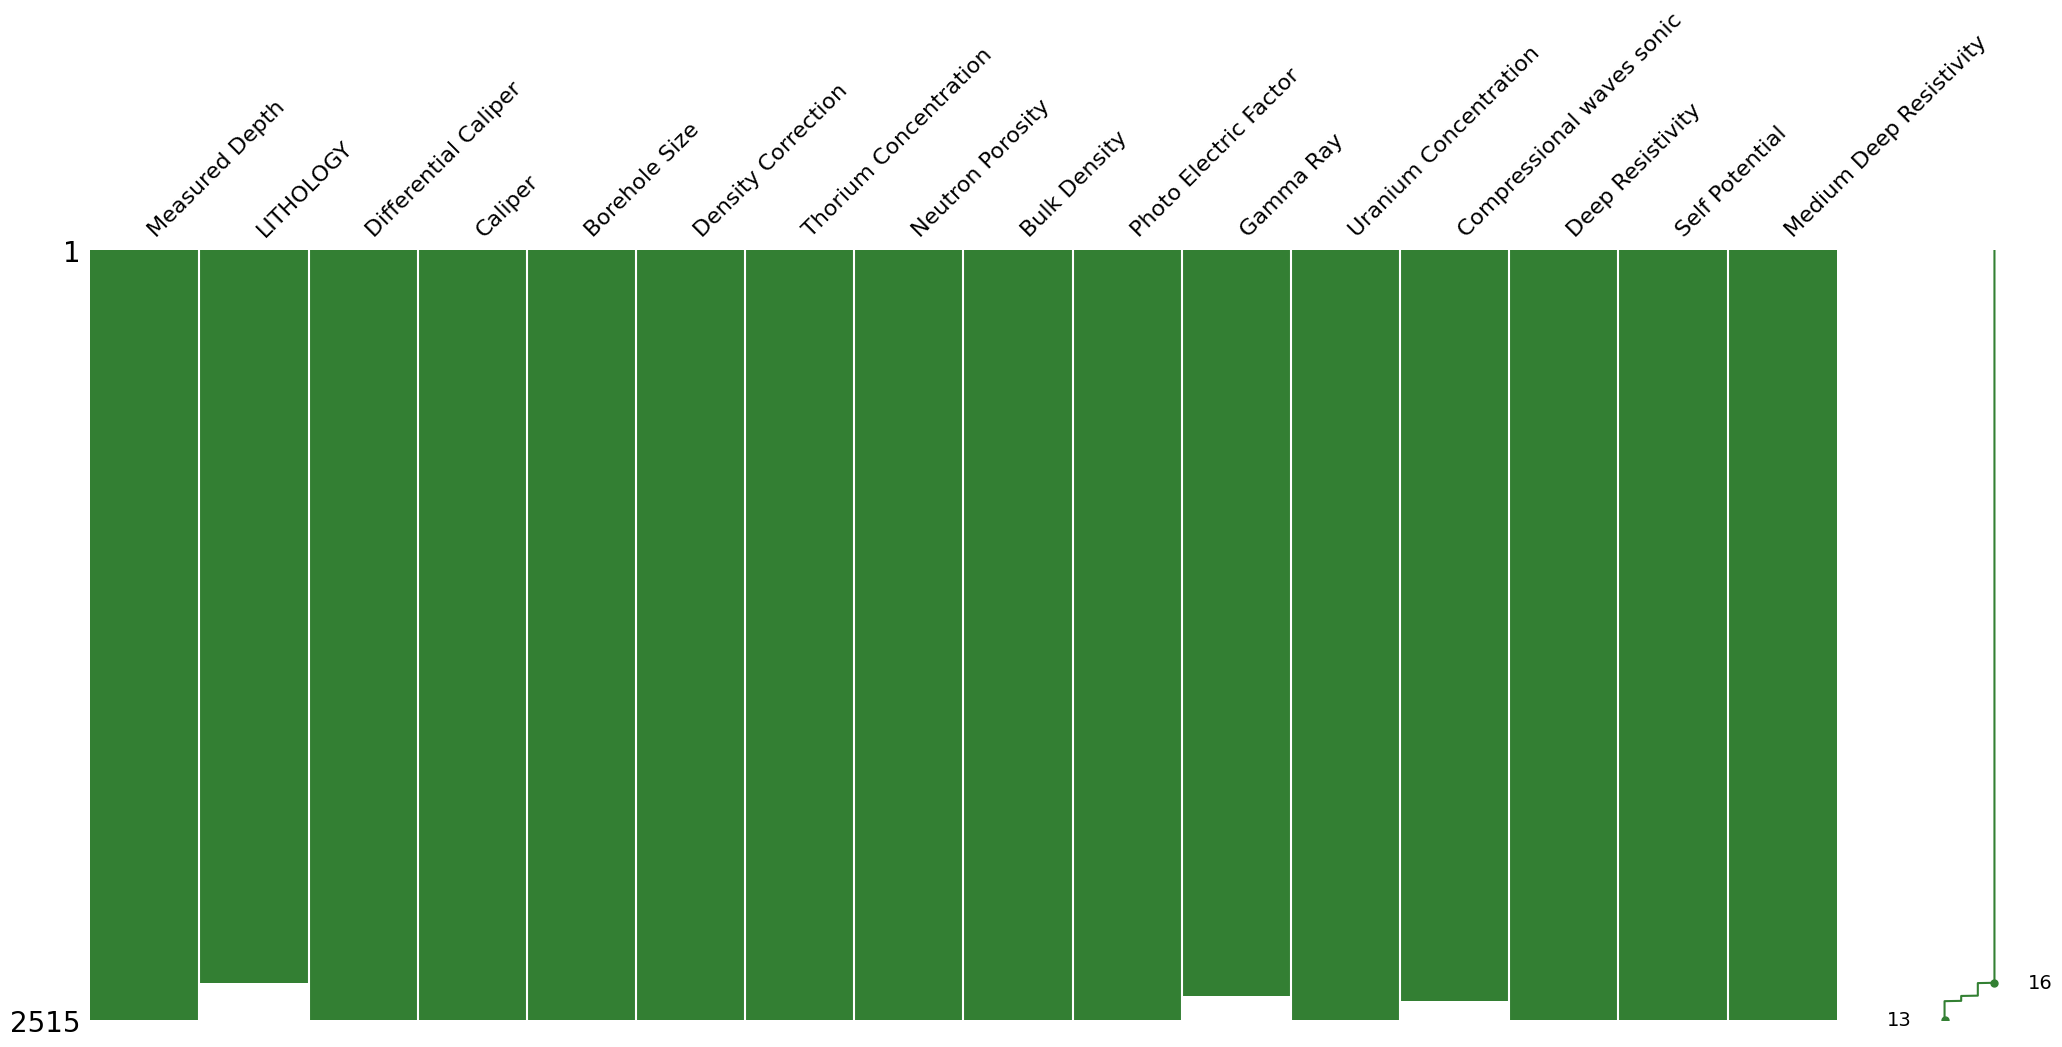

In [5]:
msno.matrix(df, color=(0.2, 0.5, 0.2))

In [6]:
df.isnull().sum()

Measured Depth                 0
LITHOLOGY                    122
Differential Caliper           0
Caliper                        0
Borehole Size                  0
Density Correction             0
Thorium Concentration          0
Neutron Porosity               0
Bulk Density                   0
Photo Electric Factor          0
Gamma Ray                     80
Uranium Concentration          0
Compressional waves sonic     63
Deep Resistivity               0
Self Potential                 0
Medium Deep Resistivity        0
dtype: int64

In [7]:
df.dropna(inplace=True)


/tmp/ipykernel_49599/2889200819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


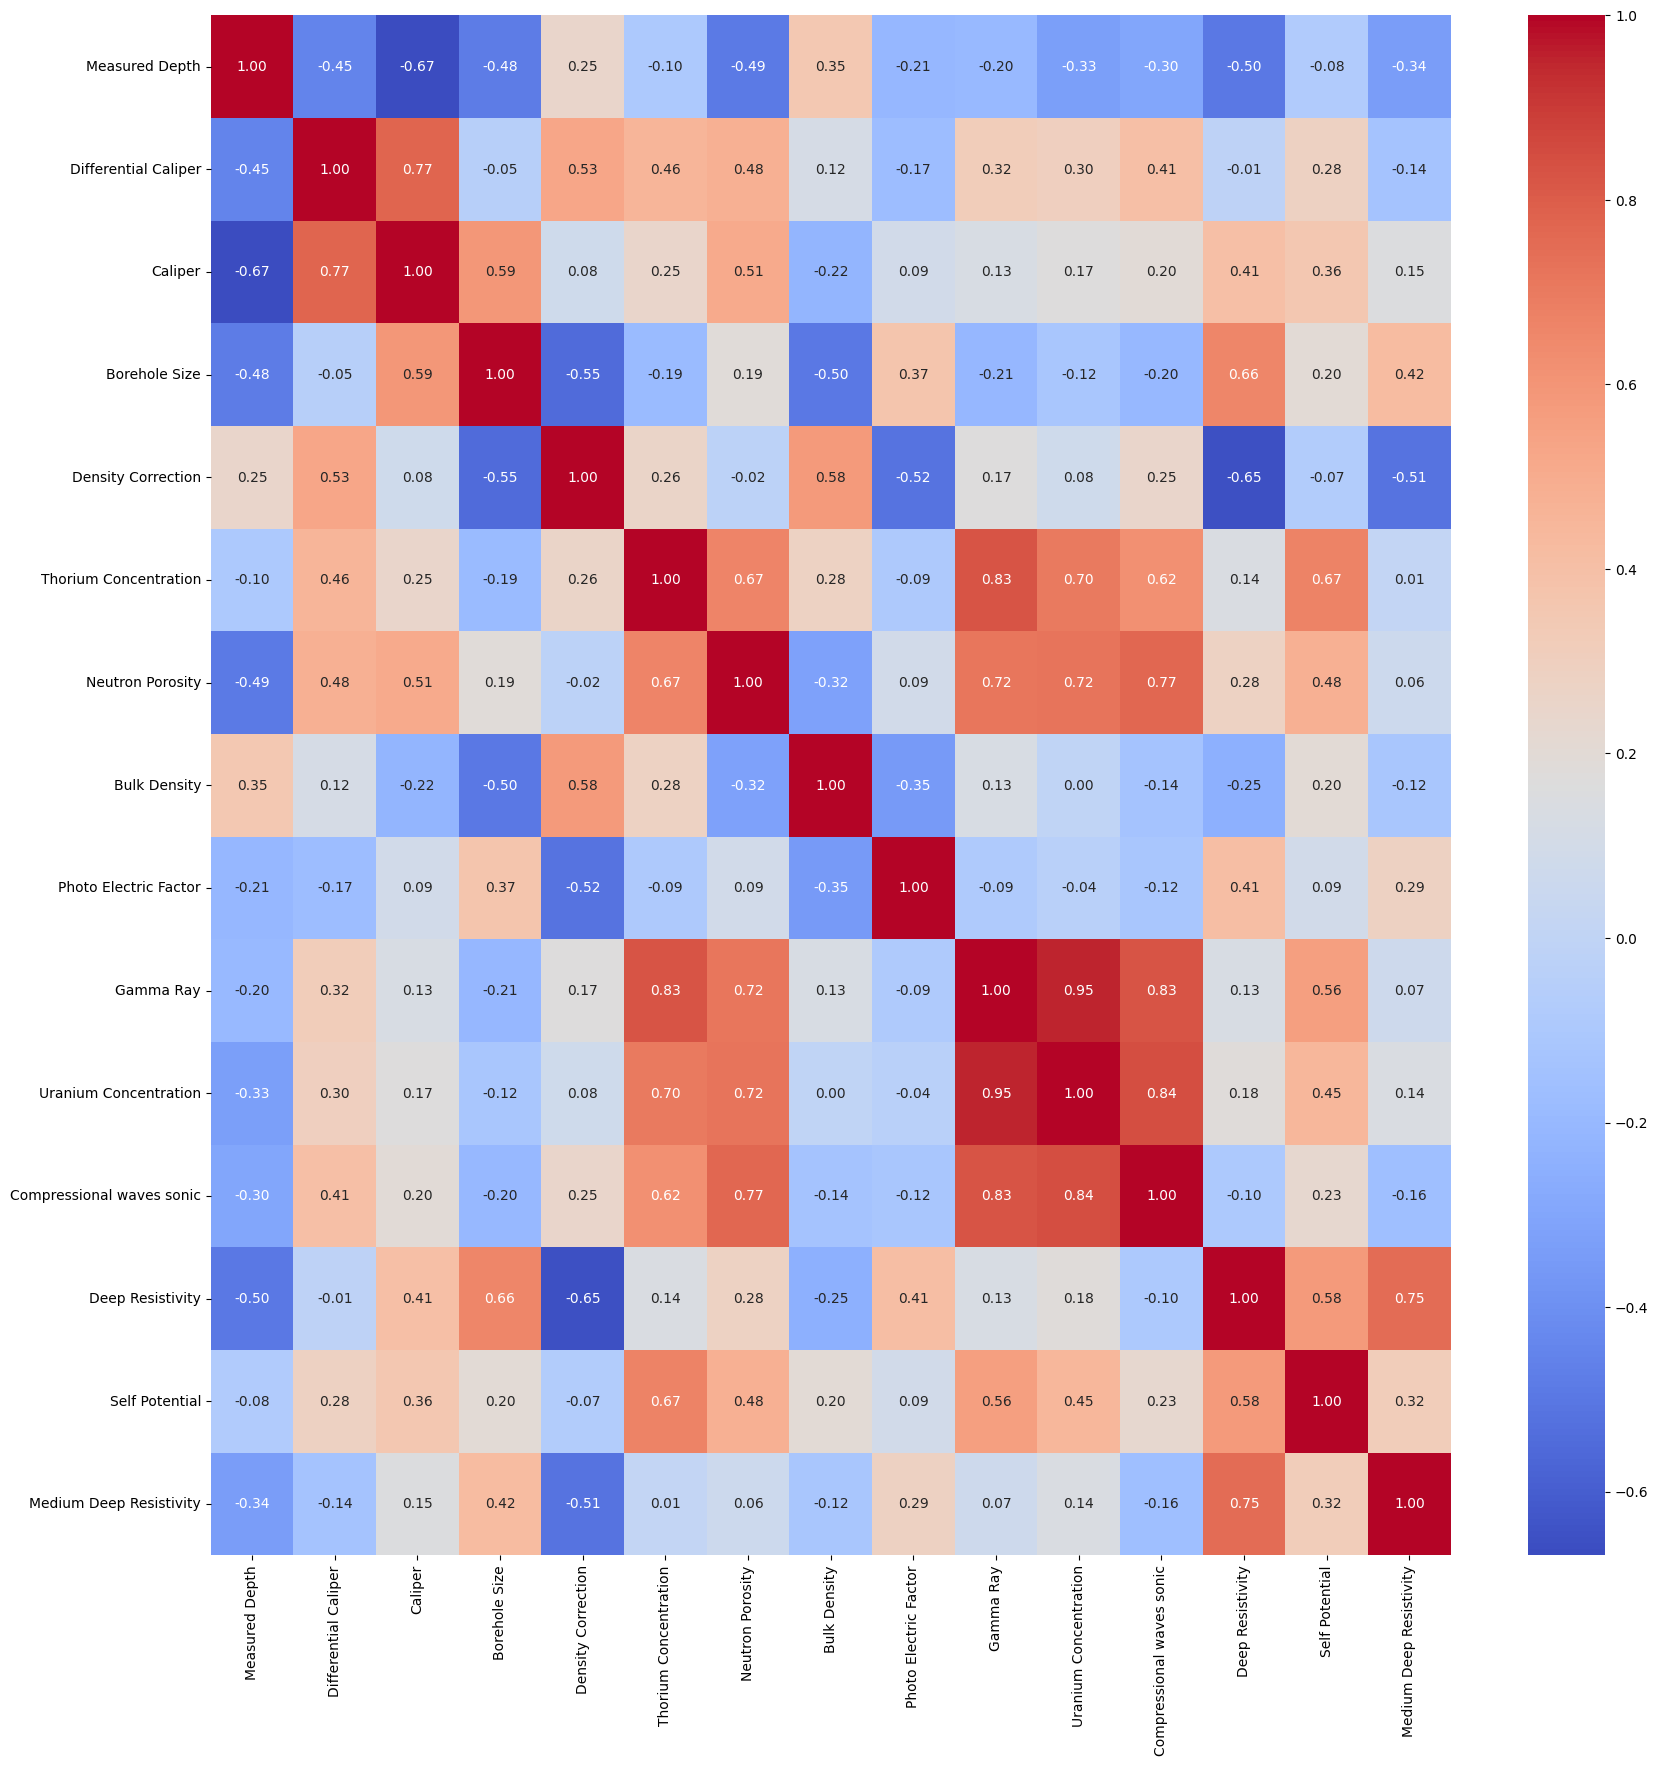

In [8]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

- If the log has both **Shear wave sonic** and **Compressional wave sonic**, they are highly correlated
- If the log has **Uranium Concentration** or **Thorium Concentration**, they are highly correlated with **Gamma Rays** as all of them emit Gamma Rays
- **Caliper** and **Borehole size** are highly correlated which is expected
- **Neutron porosity** and **compressional wave sonic** (or **Shear wave sonic**) are highly correlated which gives an indication that we can give up on the 'Neutron porosity' sensor as it is highly expensive and dangerous (nuclear hazard)
- **Gamma Rays** are not always highly correlated with **Neutron porosity** (and in turn with **compressional wave sonic** ..) but sometimes they are depending on the formation
- **Deep Resistivity**, **Medium Deep Resistivity**, **Shallow Resistivity**, and **Micro Resistivity** are relatively highly correlated because generally they measure the same value 